In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import cv2 
import glob


In [2]:
nx=6
ny=9
#creating an object
objp = np.zeros((6*9,3), np.float32)
# abjp= np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


In [3]:
def get_points(images,ny=9,nx=6):
#     print(images)
    objpoints=[]# for 3d space
    imgpoints=[]# for 2d space

  
    for i in range(len(images)):
        img=cv2.imread(images[i])
#         print(img)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (ny,nx),None)
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            img = cv2.drawChessboardCorners(img, (ny,nx), corners, ret)
    return objpoints,imgpoints,img

In [7]:
images = glob.glob('cal_image/calibration*.jpg')
# images

In [8]:
ny=9
nx=6
# points=get_points(images,ny,nx)


In [6]:
import pickle
file = open('points', 'rb')

# dump information to that file
points= pickle.load(file)
c1=pickle.load(file)
d1=pickle.load(file)
# close the file
file.close()

In [7]:

def cal_undistort(img, cameraMatrix,distCoeffs):

    undist=cv2.undistort(img,cameraMatrix,distCoeffs,None,cameraMatrix)
    return undist

In [8]:
print(c1)
print(d1)

[[1.08142048e+03 0.00000000e+00 6.62788733e+02]
 [0.00000000e+00 1.09141107e+03 3.64227155e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.15000278 -0.25573007  0.00965947  0.01129696  0.129371  ]]


In [9]:
images_for_cal = glob.glob('cal_image/calibration*.jpg')

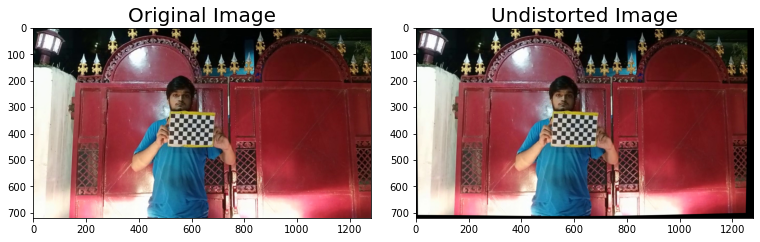

In [10]:
# a=images[0]

i=cv2.imread(images_for_cal[108])
i1 = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)

undistorted = cal_undistort(i, c1,d1)
i2 = cv2.cvtColor(undistorted,cv2.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(i1)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(i2)
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [11]:
import glob
test_images = glob.glob('data\*.jpg')
import cv2


In [12]:
def show_cv2(img):
    cv2.imshow('1',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [21]:
def nothing(x):
    pass
def color_transformation(image):

    transfer_color=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    sensitivity = cv2.getTrackbarPos('Sensitivity', 'color_')
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    mask1=cv2.inRange(transfer_color,lower_white,upper_white)
    lyx=cv2.getTrackbarPos('X_Lower_yellow', 'color_')
    lyy=cv2.getTrackbarPos('Y_Lower_yellow', 'color_')
    lyz=cv2.getTrackbarPos('Z_Lower_yellow', 'color_')
    lower_yellow = np.array([lyx,lyy,lyz])
    lux=cv2.getTrackbarPos('X_Upper_yellow', 'color_')
    luy=cv2.getTrackbarPos('Y_Upper_yellow', 'color_')
    luz=cv2.getTrackbarPos('Z_Upper_yellow', 'color_')
    upper_yellow = np.array([luz,luy,luz])
    mask2=cv2.inRange(transfer_color,lower_yellow,upper_yellow)
    mask3=mask1+mask2
    return mask3




In [22]:
def wrap(undst_image):

    img_size=(undst_image.shape[1],undst_image.shape[0])

    llx=cv2.getTrackbarPos('llx', 'warped')
    lly=cv2.getTrackbarPos('lly', 'warped')
    
    lhx=cv2.getTrackbarPos('lhx', 'warped')
    lhy=cv2.getTrackbarPos('lhy', 'warped')
    
    rlx=cv2.getTrackbarPos('rlx', 'warped')
    rly=cv2.getTrackbarPos('rly', 'warped')
    
    rhx=cv2.getTrackbarPos('rhx', 'warped')
    rhy=cv2.getTrackbarPos('rhy', 'warped')
    
    
    
    left_low=[llx,lly]
    left_high=[lhx,lhy]
    
    right_low=[rlx,rly]
    right_high=[rhx,rhy]
    
    
    src=np.float32([left_low,left_high,right_high,right_low]) # Source Points for Image Warp

    dst= np.float32([[150 ,720], [150 ,0], [1200 ,0], [1200 ,720]]) # Destination Points for Image Warp

    M=cv2.getPerspectiveTransform(src,dst)

    Minv=cv2.getPerspectiveTransform(dst,src)


    warped = cv2.warpPerspective(undst_image, M, img_size,flags=cv2.INTER_LINEAR)

    return warped,M,Minv

In [23]:

import matplotlib.pyplot as plt
%matplotlib inline
def hist(img):
    img=img/255.0
    vertices=np.float32([])
    bottom_half = img[img.shape[0]//2:,:]
    histogram = np.sum(bottom_half,axis=0)
    
    return histogram


In [24]:
i1 = glob.glob('data/*')
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# Now main functions


In [25]:
def find_lane_pixels(binary_warped,plot=False):
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 12
    # Set the width of the windows +/- margin
    margin = 75
    # Set minimm number of pixels found to recenter window
    minpix = 300

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx_current = leftx_base
    rightx_current = rightx_base

    left_lane_inds = []
    right_lane_inds = []
    a=[]
    b=[]
    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current-margin  # Update this
        win_xleft_high = leftx_current+margin  # Update this
        win_xright_low = rightx_current-margin  # Update this
        win_xright_high = rightx_current+margin  # Update this
        
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
              
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        if len(good_left_inds)>minpix:
                
            leftx_current=np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    try:
        left_fit = np.polyfit(lefty,leftx,2)
        right_fit = np.polyfit(righty,rightx,2)
    except:
        pass
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    out_img[lefty, leftx] = [0, 255, 0]
    out_img[righty, rightx] = [0, 0, 255]

    mark_size = 3

    a_img=np.copy(out_img)
    line_thickness = 2
    
    return out_img,left_fit,right_fit,left_fitx,right_fitx


In [26]:
global previous_left,previous_right
previous_left=np.array([])
previous_right=np.array([])
def draw_lines(undist, warped,left_fit, right_fit, left_cur, right_cur, center,Minv, show_img = False ):
     
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    #ploty has an shape of 270
    ploty = np.linspace(0, warped.shape[0]-1,warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
    right_fitx = right_fit[0]*ploty**2+right_fit[1]*ploty+right_fit[2]
    np.append(previous_left,left_fitx)
    np.append(previous_right,right_fitx)
    #Here i am also averaging it for reducing error 
    d1=previous_left.shape
    if d1[0]==0:
        pass
    else:
        left_fitx=sum(previous_left)/d1[0]
        right_fitx=sum(previous_right)/d1[0]
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left,pts_right))
    
    cv2.fillPoly(color_warp, np.int_([pts]), (0,250, 0))
    
    newwarp = cv2.warpPerspective(color_warp, Minv, (undist.shape[1], undist.shape[0])) 
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    if show_img == True:
        plt.figure(figsize=(10,10))
        fig = plt.figure()
        plt.imshow(result)
    
    return result

In [27]:
import numpy as np

def generate_data(binary_warped,left_fit,right_fit):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    shape=binary_warped.shape
    ploty = np.linspace(0, shape[0]-1, num=shape[0])# to cover same y-range as image
 
    
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] 
    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)

    
    return ploty, left_fit_cr, right_fit_cr

    
def measure_curvature_real(image,left_fit,right_fit,print_data=False):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    ym_per_pix = 30/720# meters per pixel in y dimension
    xm_per_pix = 3.7/1080 # meters per pixel in x dimension
    
    ploty, left_fit_cr, right_fit_cr = generate_data(image,left_fit,right_fit)

    positionCar=image.shape[1]/2
    y_eval=np.max(ploty)
    

    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    left_lane_bottom = (left_fit[0]*y_eval)**2 + left_fit[1]*y_eval + left_fit[2]
    right_lane_bottom = (right_fit[0]*y_eval)**2 + right_fit[1]*y_eval + right_fit[2]
    
    actualPosition= (left_lane_bottom+ right_lane_bottom)/2
    
    center= (positionCar - actualPosition)* xm_per_pix
    
    
    if print_data == True:
        print(left_curverad, 'm', right_curverad, 'm', center, 'm')

    return left_curverad, right_curverad, center



In [28]:
def resize(img):
    '''This functioon is for resizing the images'''
    size=img.shape
    img=cv2.resize(img,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    return img

In [34]:

images_for_test = glob.glob('test_images/*.jpg')
images_for_cal = glob.glob('cal_image/calibration*.jpg')
def callibration():
    '''For callibration'''
    
    objpoints,imgpoints,img=get_points(images_for_cal,9,6)# this is for calibration
    return objpoints,imgpoints
objpoints,imgpoints=callibration()


In [35]:
#if we have saved the pikle file for that then, we can do this other wise we can use codes in next lin
import pickle
file = open('points', 'rb')

# dump information to that file
points= pickle.load(file)
c1=pickle.load(file)#Camera Matrix
d1=pickle.load(file)#Distortion matrix
# close the file
file.close()

In [36]:
# def callibration():
'''This is the main pipeline of the image'''
# objpoints,imgpoints,im=get_points(images_for_cal,9,6)# this is for calibration
def pipeline(image,objpoints,imgpoints):
    ''' so here the image has dimenshion 720x1080'''
    '''undist is undistorted image'''
    undist=cal_undistort(image,c1,d1)
    undist=np.copy(image)
    '''mask 3 is after color thresholding'''
    mask3=color_transformation(undist)
    size=mask3.shape
    '''warped_image and src are the Transformation to each other minv is the matrix'''
    warped_image,src,minv=wrap(undist)
    '''After using this transformation the warped_image shape becomes (270,1080)
    and same is for others'''
    
    
    newwarp = cv2.warpPerspective(warped_image, minv, (warped_image.shape[1],warped_image.shape[0])) 
 
    '''per col transformation is the warped image after color transformation'''
    per_col_transform=color_transformation(warped_image)
    '''Mask3 is just image after thresholding'''
    mask3=cv2.resize(mask3,(per_col_transform.shape[1],per_col_transform.shape[0]),interpolation=cv2.INTER_AREA)    
    result = cv2.addWeighted(image, 1, newwarp, 0.5, 0)
    
    
    
    out_img,left_fit,right_fit,left_fitx,right_fitx=fit_polynomial(per_col_transform)
    
    left_curverad, right_curverad,center=measure_curvature_real(per_col_transform,left_fit,right_fit)
    

    i=draw_lines(image,per_col_transform,left_fit, right_fit, left_curverad, right_curverad, center,minv)
    
    verticalAppendedImg = np.vstack((result,newwarp))
    horizontalAppendedImg = np.hstack((mask3,per_col_transform))
    verticalAppendedImg=cv2.resize(verticalAppendedImg,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    horizontalAppendedImg=cv2.resize(horizontalAppendedImg,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    r1=resize(i)
    r2=resize(out_img)
    '''it return 6 things 
    1.An visualisation
    2.Another visuaisation
    3.An test (curvature valure)
    4.An test (curvature valure)
    5.This is an visualtion after when each type of transformation has been taken place i.e color and then warp
    6. Final Result
    '''
    per_col_transform=resize(per_col_transform)
    warped_image=resize(warped_image)
    return verticalAppendedImg,horizontalAppendedImg,left_curverad, right_curverad,per_col_transform,r1,r2,warped_image

In [41]:
import os
# path="E:\\E Recover\\Rit\\E(NTFS)\\video_test"
# os.listdir(path)
# path=os.getcwd()+"\\Raw_Video"
# video_file="\\V5WL_R.mp4"
# video_=os.path.join(path+video_file)
# video_
video_="lan1.mp4"
# video_='Raw_Video/V4WL_R'

In [44]:
cv2.namedWindow('color_')
cv2.resizeWindow('color_', 300,300)
cv2.createTrackbar('Sensitivity', 'color_', 130, 255, nothing)
cv2.createTrackbar('X_Lower_yellow', 'color_', 255, 255, nothing)
cv2.createTrackbar('Y_Lower_yellow', 'color_', 255, 255, nothing)
cv2.createTrackbar('Z_Lower_yellow', 'color_', 255, 255, nothing)

cv2.createTrackbar('X_Upper_yellow', 'color_', 255, 255, nothing)
cv2.createTrackbar('Y_Upper_yellow', 'color_', 255, 255, nothing)
cv2.createTrackbar('Z_Upper_yellow', 'color_', 255, 255, nothing)

cv2.namedWindow('warped')
cv2.resizeWindow('warped', 300,300)


cv2.createTrackbar('llx', 'warped', 295, 1280, nothing)
cv2.createTrackbar('lly', 'warped', 720, 720, nothing)

cv2.createTrackbar('rlx', 'warped', 1235, 1280, nothing)
cv2.createTrackbar('rly', 'warped', 720,720, nothing)

cv2.createTrackbar('rhx', 'warped', 850,1280, nothing)
cv2.createTrackbar('rhy', 'warped', 430, 720, nothing)

cv2.createTrackbar('lhx', 'warped', 675, 1280, nothing)

cv2.createTrackbar('lhy', 'warped', 424,720, nothing)

cap = cv2.VideoCapture('112.mp4')
ret,frame = cap.read()

# avg1 = np.float32(frame)
frame = np.float32(frame)

currentframe=0
import numpy as np
import cv2
cap = cv2.VideoCapture(video_)
size = (1280,720) 
   
# Below VideoWriter object will create 
# a frame of above defined The output  
# is stored in 'filename.avi' file. 
result = cv2.VideoWriter('output.mp4',  
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         10, size) 
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280,720),  
               interpolation = cv2.INTER_NEAREST) 
#     frame= cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
#     frame= cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    if ret==True:
        try:
            v,h,l,r,p,i,r2,w=pipeline(frame,objpoints,imgpoints)
            
            cv2.imshow('3d',v)
            
            
            cv2.imshow('2d',h)
            
            
            cv2.imshow('color_',p)
            
                

            cv2.imshow('final',i)
            
            
            cv2.imshow('r2',r2)
            
            cv2.imshow('warped',w)
            result.write(i) 
            
            
#             cv2.imwrite('out',)
        except:
            pass
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break

cap.release()
result.release()
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
